# Plot of noise levels in the lens potential in wavelet space

__last update__: 25/08/22

In [1]:
%config InlineBackend.figure_format = 'retina'

import os
import copy
import numpy as np
import pickle as pkl
from astropy.io import fits
from scipy.optimize import minimize
import seaborn as sns # for nicer colors on the plot

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.colors import Normalize, LogNorm, ListedColormap, TwoSlopeNorm
from matplotlib import patches as mpatches
%matplotlib inline

plt.rc('image', interpolation='none', origin='lower')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"

from herculens.Util.plot_util import nice_colorbar, nice_colorbar_residuals

In [2]:
SAVE_FIGURES = False
figure_dir = 'figures'

In [3]:
with open(os.path.join('results', f'noise_pixpot_example-scale_3-smooth_source.pkl'), 'rb') as f:
    data, lens_image_fit, kwargs_smooth_fit, starlet_maps, battle_maps = pkl.load(f)
    
    
model = lens_image_fit.model(**kwargs_smooth_fit, lens_light_add=False)
#smooth_residuals = model - data
data_cov_source = lens_image_fit.Noise.C_D_model(model)

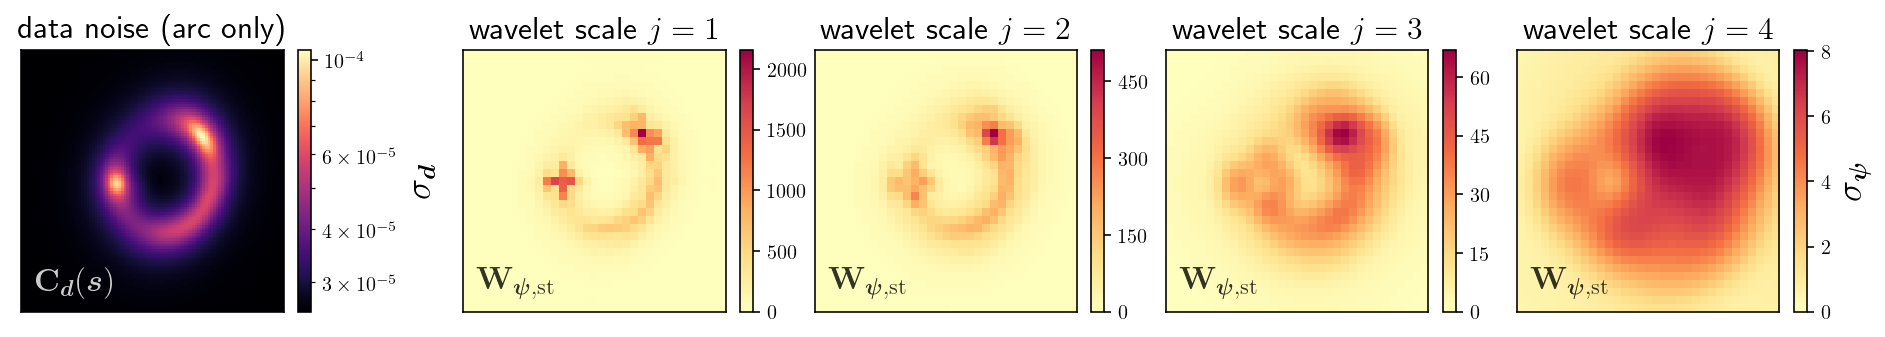

In [33]:
fontsize = 16

cmap = 'Spectral_r'

use_common_pot_vmax = False  # or None 
common_pot_vmax = 0.04

cb_pad = 0.1

num_scales = 4
num_rows = 1
num_cols = 1 + 1 + num_scales
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 2.5), 
                         gridspec_kw={'width_ratios': [1]+[0.1]+[1]*num_scales})
axes = axes.flatten()

# remove all ticks from axes
if num_scales > 1:
    for ax in axes.flatten():
        ax.set_xticks([])
        ax.set_yticks([])
else:
    axes.set_xticks([])
    axes.set_yticks([])
    
# data covariance matrix
ax = axes[0]
#ax.set_title(r"$\boldsymbol{\rm C}_{\boldsymbol{d}}(\boldsymbol{s})$", fontsize=fontsize)
ax.set_title("data noise (arc only)", fontsize=fontsize)
im = ax.imshow(data_cov_source, norm=LogNorm(), 
               cmap='magma')
im.set_rasterized(True)
ax.text(0.05, 0.05, r"$\boldsymbol{\rm C}_{\boldsymbol{d}}(\boldsymbol{s})$", 
        fontsize=fontsize, color='white', alpha=0.8,
        va='bottom', ha='left', transform=ax.transAxes)
#label = r"$\boldsymbol{\psi}_{\rm pix}$ std dev." if last_col else None
#label = r"${\rm diag}\,|\mathsf{C}_{\delta\psi,\rm st}|^{1/2}$" if last_col else None
#label = r"$\sigma_{\boldsymbol{d}}(\boldsymbol{s})$" if last_col else None
label = r"$\sigma_{\boldsymbol{d}}$"
cb = nice_colorbar(im, pad=cb_pad, label=label, 
                   fontsize=fontsize+2, invisible=False)
#cb.ax.set_yticklabels([r"$10^{$"+f"{np.log10(v)}" for v in cb.get_ticks()]) # set ticks of your format

ax = axes[1]
ax.axis('off')  # this one is just for spacing

for k in range(num_scales):
    
    last_col = (k == num_scales-1)
    
    if num_scales > 1:
        ax = axes[k+2]
    else:
        ax = axes[2]
    #ax.set_title(r"$\boldsymbol{\psi}_{\rm pix}$ weights " + f"($j={k}$)", fontsize=fontsize)
    ax.set_title(f"wavelet scale $j={k+1}$", fontsize=fontsize)
    im = ax.imshow(starlet_maps[k], norm=TwoSlopeNorm(0), cmap=cmap)
    im.set_rasterized(True)
    ax.text(0.05, 0.05, r"$\boldsymbol{\rm W}_{\boldsymbol{\psi},\rm st}$", 
            fontsize=fontsize, color='black', alpha=0.8,
            va='bottom', ha='left', transform=ax.transAxes)
    #label = r"$\boldsymbol{\psi}_{\rm pix}$ std dev." if last_col else None
    #label = r"${\rm diag}\,|\mathsf{C}_{\delta\psi,\rm st}|^{1/2}$" if last_col else None
    #label = r"$\sigma_{\delta\psi,\rm st}$" if last_col else None
    label = r"$\sigma_{\boldsymbol{\psi}}$" if last_col else None
    #cb = fig.colorbar(im, ax=ax)
    cb = nice_colorbar(im, pad=cb_pad,  label=label, 
                       fontsize=fontsize+2, invisible=False)
    tick_locator = ticker.MaxNLocator(nbins=5)
    cb.locator = tick_locator
    cb.update_ticks()

fig.subplots_adjust(hspace=0, wspace=0.25)
#fig.tight_layout()
plt.show()

In [34]:
if SAVE_FIGURES:
    figure_name = 'noise_in_potential_wavelets.pdf'
    fig.savefig(os.path.join(figure_dir, figure_name), dpi=300, bbox_inches='tight', transparent=False)